In [56]:
#pip install yfinance

In [57]:
import yfinance as yf
from datetime import datetime

In [58]:
end = datetime.now()
start = datetime(year = end.year-20,month = 1,day = end.day)
stock = "GOOG"
stock_data = yf.download(stock,start,end)

C:\Users\Anshit\AppData\Local\Temp\ipykernel_4652\843523676.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [59]:
stock_data.head

<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            GOOG        GOOG        GOOG        GOOG       GOOG
Date                                                                 
2005-01-18    5.048456    5.076186    4.918717    4.975910  528878966
2005-01-19    4.885044    5.083120    4.870436    5.067026  451995865
2005-01-20    4.801356    4.859046    4.753819    4.766198  361413608
2005-01-21    4.661713    4.837010    4.657752    4.816707  371724110
2005-01-24    4.474531    4.687710    4.464627    4.671864  563010421
...                ...         ...         ...         ...        ...
2025-06-11  178.789993  181.750000  178.000000  181.229996   18994400
2025-06-12  176.970001  178.130005  176.110001  177.479996   17345900
2025-06-13  175.880005  178.343002  173.570007  173.580002   20873200
2025-06-16  177.940002  178.244995  175.820007  175.904999   18132500
2025-06-17  177.229996  178.710007  175.940002  177.009995  

In [60]:
stock_data.shape

(5137, 5)

In [61]:
stock_data.describe

<bound method NDFrame.describe of Price            Close        High         Low        Open     Volume
Ticker            GOOG        GOOG        GOOG        GOOG       GOOG
Date                                                                 
2005-01-18    5.048456    5.076186    4.918717    4.975910  528878966
2005-01-19    4.885044    5.083120    4.870436    5.067026  451995865
2005-01-20    4.801356    4.859046    4.753819    4.766198  361413608
2005-01-21    4.661713    4.837010    4.657752    4.816707  371724110
2005-01-24    4.474531    4.687710    4.464627    4.671864  563010421
...                ...         ...         ...         ...        ...
2025-06-11  178.789993  181.750000  178.000000  181.229996   18994400
2025-06-12  176.970001  178.130005  176.110001  177.479996   17345900
2025-06-13  175.880005  178.343002  173.570007  173.580002   20873200
2025-06-16  177.940002  178.244995  175.820007  175.904999   18132500
2025-06-17  177.229996  178.710007  175.940002  177.0099

In [62]:
stock_data.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [63]:
import matplotlib.pyplot as plt
def plot_graph(figsize,values,column):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column)


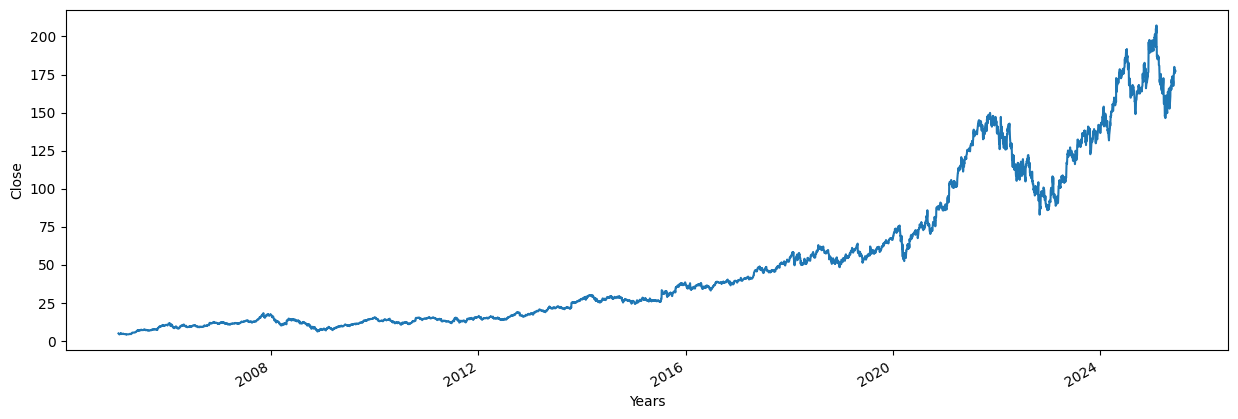

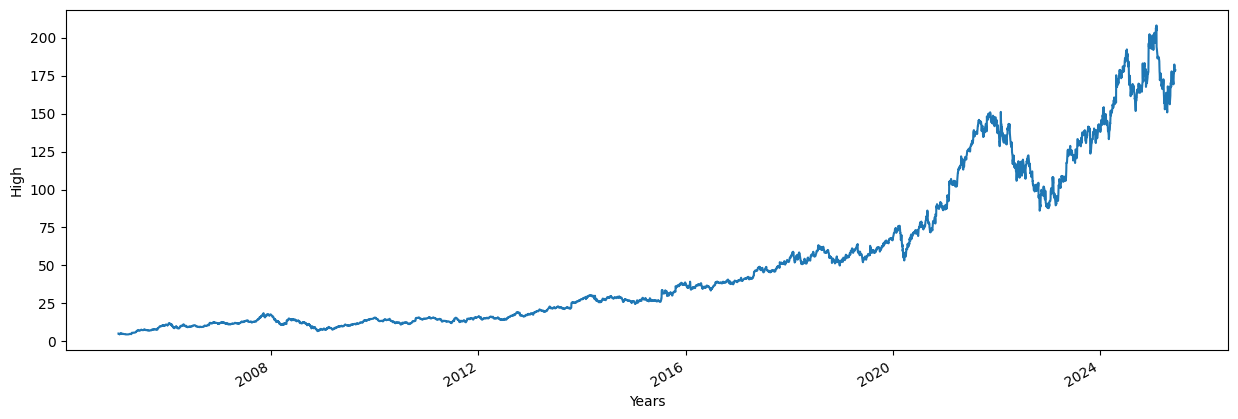

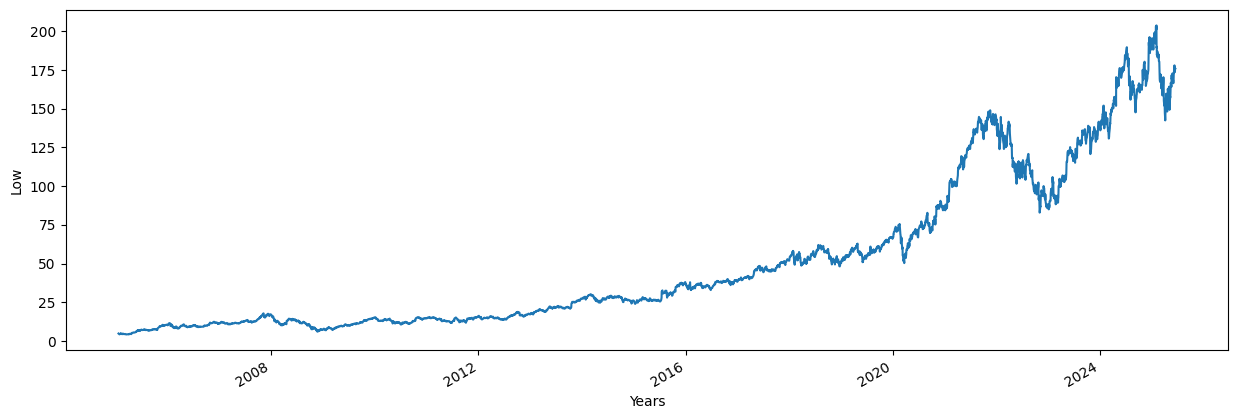

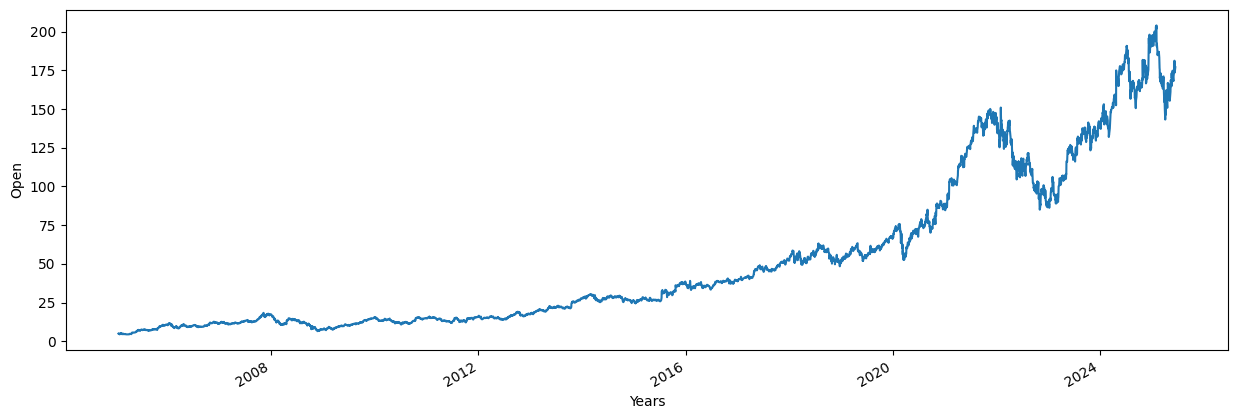

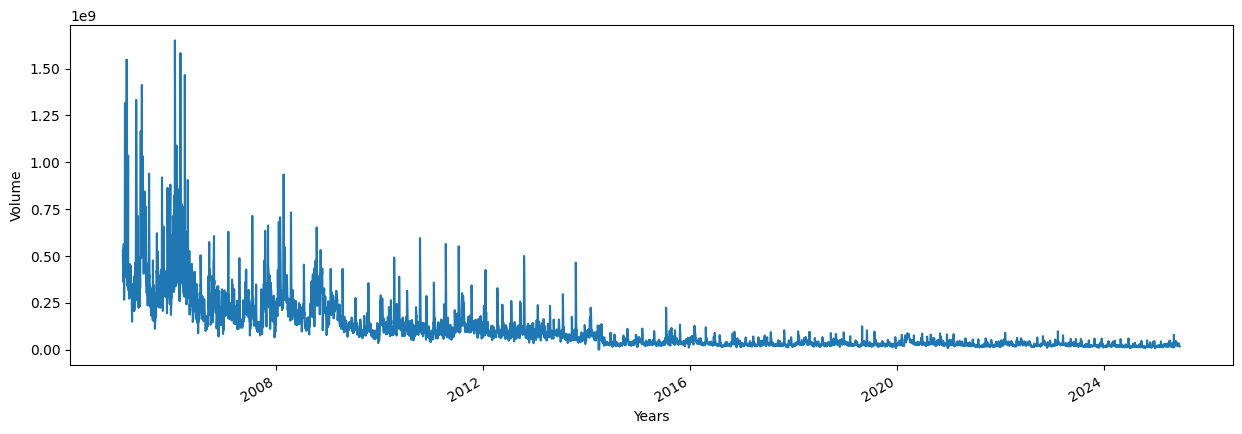

In [64]:
for i in stock_data.columns:
    plot_graph((15,5),stock_data[i],i[0])

In [65]:
#seeing average no. of days each year
for i in range(start.year,end.year):
    print(i,list(stock_data.index.year).count(i))

2005 242
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [66]:
stock_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [67]:
#seeing it is almost 250 lets calculate moving average of Close
import pandas as pd
stock_data['MA for 250 days'] = stock_data['Close'].rolling(250).mean()
stock_data['MA for 250 days'].isnull().sum()

np.int64(249)

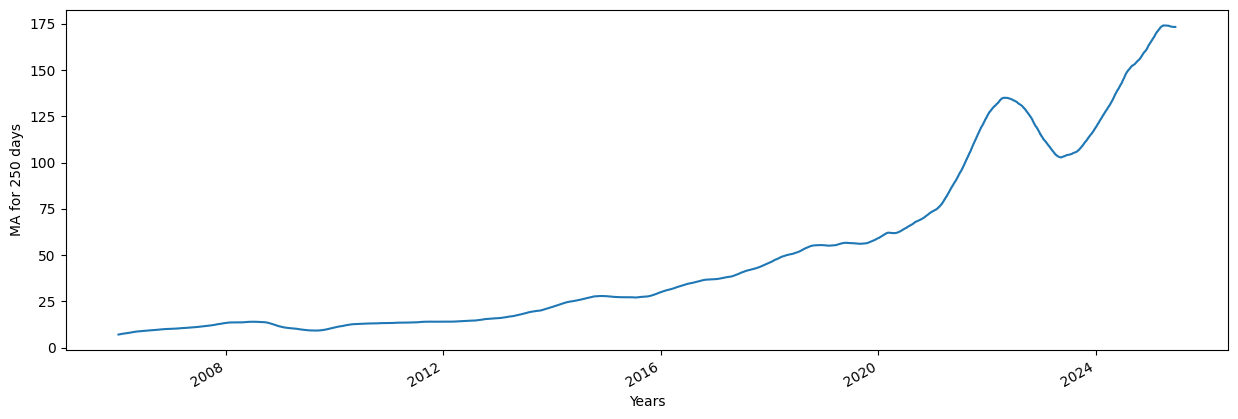

In [68]:
plot_graph((15,5),stock_data['MA for 250 days'],"MA for 250 days")

In [69]:
stock_data['MA for 100 days'] = stock_data['Close'].rolling(100).mean()
stock_data['MA for 100 days']

Date
2005-01-18           NaN
2005-01-19           NaN
2005-01-20           NaN
2005-01-21           NaN
2005-01-24           NaN
                 ...    
2025-06-11    171.789055
2025-06-12    171.587872
2025-06-13    171.355037
2025-06-16    171.138812
2025-06-17    170.919977
Name: MA for 100 days, Length: 5137, dtype: float64

<Figure size 640x480 with 0 Axes>

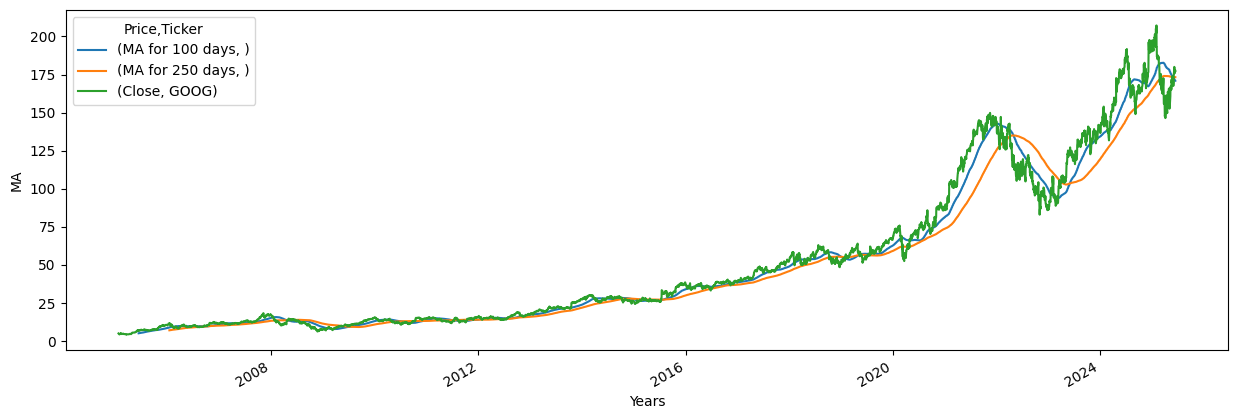

In [76]:
plot_graph((15,5),stock_data[['MA for 100 days','MA for 250 days','Close']],'MA')